# [Paper](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

In [335]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [336]:
names = set()
with open("names.csv", "r") as csvfile:
     csvreader = csv.reader(csvfile)
     for row in csvreader:
        name = row[0].split(";")[1]
        if name[0] != "_":
            names.add(name)

In [337]:
alphabet = set()
for name in names:
    for l in name:
        alphabet.add(l)
N = len(alphabet)+1
stoi = {i:k+1 for k,i in enumerate(alphabet)}
stoi['.'] = 0
itos = {k:i for i,k in stoi.items()}

In [338]:
block_size = 3
def build_dataset(names):
    X, Y = [], []
    for name in names:
        context = [0]*block_size
        for ch in name + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    return torch.tensor(X),torch.tensor(Y)

names = list(names)
import random
random.shuffle(names)
Xtrain, Ytrain = build_dataset(names[:int(0.9*len(names))])
Xtest, Ytest = build_dataset(names[int(0.9*len(names)):])

In [344]:
L0 = torch.randn((52, 20))
W1 =  torch.randn((60, 300))
B1 = torch.randn(300)
W2 = torch.randn((300, 52))
B2 = torch.randn(52)
parameters = [L0, W1, B1, W2, B2]
for p in parameters:
    p.requires_grad = True

In [345]:
lossi = []
stepi = []

1.9189684391021729
2.19647479057312


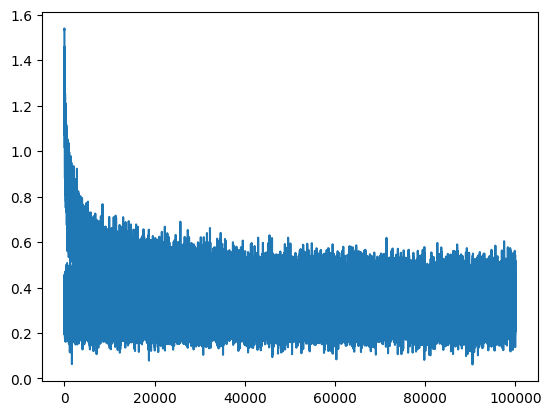

In [350]:
for i in range(100000):
    ix = torch.randint(0, Xtrain.shape[0], (32,))
    h = (L0[Xtrain[ix]].view(-1,60) @ W1 + B1).tanh()
    logits = h @ W2 + B2
    loss = F.cross_entropy(logits, Ytrain[ix])
    for p in parameters:
        p.grad = None
    loss.backward()
    lossi.append(loss.log10().item())
    stepi.append(i)
    for p in parameters:
        p.data += -0.01*p.grad

print(loss.item()) 
print(F.cross_entropy((L0[Xtest].view(-1,60) @ W1 + B1).tanh() @ W2 + B2, Ytest).item())
plt.plot(stepi, lossi)

# Samples

In [351]:
@torch.no_grad()
def sample():
    for _ in range(20):
        out = []
        context = [0]*block_size
        while True:
            emb = L0[torch.tensor(context)]
            h = (emb.view(1, -1) @ W1 + B1).tanh()
            logits = h @ W2 + B2
            probs = F.softmax(logits, dim=1)
            ix = torch.multinomial(probs, 1).item()
            context = context[1:] + [ix]
            out.append(ix)
            if ix == 0:
                break
        print(''.join(itos[c] for c in out))

EYLOUIS-MARIENELSEM.
JOEDEN.
ERGENICORYAN.
JAIE.
EDMILIANSA.
ZEPHIM.
ILA.
SENDDLO.
JOSIA.
ILIE.
SCHARITZEL.
LYA.
RYMA.
RALILIDA.
GHILIYA.
PIERREL.
JEZEKELINA.
CHRISLAWEEN.
SWEMBI.
AIUS.


In [352]:
-torch.tensor(1/52.0).log()

tensor(3.9512)